# Covid case prediction using Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [37]:
dataset_train = pd.read_csv('/content/daily_covid_cases.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 30 timesteps and 1 output

In [39]:
X_train = []
y_train = []
for i in range(30, 612):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [40]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [42]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [43]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [44]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [45]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [46]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [47]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [48]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [50]:
regressor.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
19/19 [==============================] - 1s 50ms/step - loss: 6.0438e-04
Epoch 2/40
19/19 [==============================] - 1s 40ms/step - loss: 5.8657e-04
Epoch 3/40
19/19 [==============================] - 1s 42ms/step - loss: 8.6020e-04
Epoch 4/40
19/19 [==============================] - 1s 42ms/step - loss: 8.4720e-04
Epoch 5/40
19/19 [==============================] - 1s 67ms/step - loss: 6.0690e-04
Epoch 6/40
19/19 [==============================] - 1s 60ms/step - loss: 9.0364e-04
Epoch 7/40
19/19 [==============================] - 1s 60ms/step - loss: 8.5886e-04
Epoch 8/40
19/19 [==============================] - 1s 71ms/step - loss: 8.0071e-04
Epoch 9/40
19/19 [==============================] - 1s 48ms/step - loss: 7.0314e-04
Epoch 10/40
19/19 [==============================] - 1s 46ms/step - loss: 4.9574e-04
Epoch 11/40
19/19 [==============================] - 1s 43ms/step - loss: 8.4358e-04
Epoch 12/40
19/19 [==============================] - 1s 41ms/step - loss: 

## Part 3 - Making the predictions and visualising the results

### Getting the real cases

In [51]:
dataset_test = pd.read_csv('/content/daily_covid_cases.csv')
real_cases = dataset_test.iloc[-100:, 1:2].values

### Getting the predicted cases

In [52]:
X_test = []
y_test = []
for i in range(512, 612):
    X_test.append(training_set_scaled[i-30:i, 0])
    y_test.append(training_set_scaled[i, 0])
X_test = np.array(X_test)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_Cases = regressor.predict(X_test)
predicted_Cases = sc.inverse_transform(predicted_Cases)

4/4 [==============================] - 2s 9ms/step




### Visualising the results

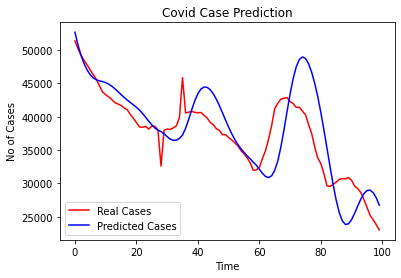

In [53]:
plt.plot(real_cases, color = 'red', label = 'Real Cases')
plt.plot(predicted_Cases, color = 'blue', label = 'Predicted Cases')
plt.title('Covid Case Prediction')
plt.xlabel('Time')
plt.ylabel('No of Cases')
plt.legend()
plt.show()